In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [7]:
df = train[['Date','Sales']]
df.head()

,Date,Sales
0,2018-01-01,7011.84
1,2018-01-01,51789.12
2,2018-01-01,36868.20
3,2018-01-01,19715.16
4,2018-01-01,45614.52


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,188340.0,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


<AxesSubplot:xlabel='Date'>

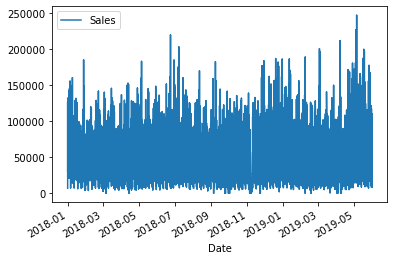

In [10]:
df.plot()

<AxesSubplot:xlabel='Date'>

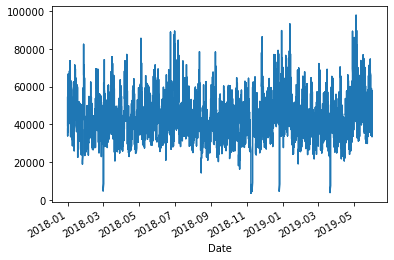

In [11]:
timeseries = df['Sales']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<AxesSubplot:xlabel='Date'>

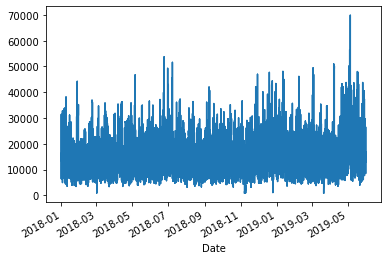

In [12]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

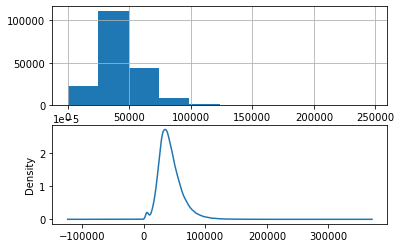

In [16]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
df.Sales.hist()
pyplot.subplot(212)
df.Sales.plot(kind='kde')
pyplot.show()

<AxesSubplot:xlabel='Date', ylabel='Sales'>

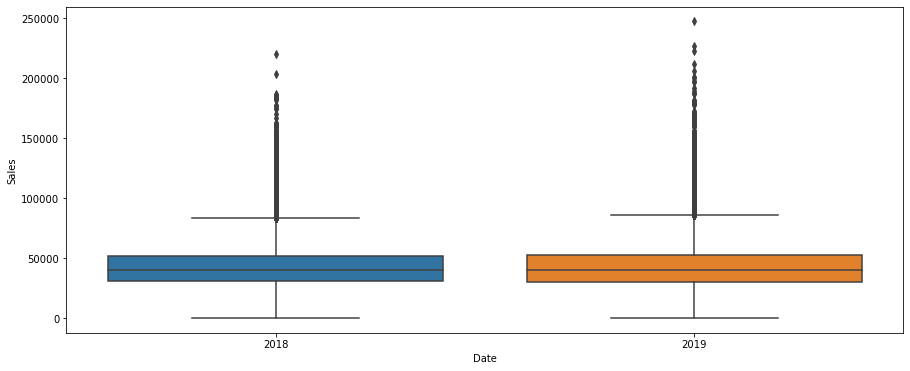

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df.Sales.index.year, df.Sales, ax=ax)